<a href="https://colab.research.google.com/github/kajol16/Matrix_Factorization/blob/main/Matrix_factorization_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving input1 (1).csv to input1 (1) (2).csv


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import io

In [ ]:
# def MF(Input_Matrix, User_Feature_Matrix, Item_Feature_Matrix, latent_features, epoch=5000, alpha = 0.0001, beta = 0.01):
#     '''
#     Input_Matrix : Input Matrix
#     User_Feature_Matrix: |U| * K (User features matrix)
#     Item_Feature_Matrix: |D| * K (Item features matrix)
#     K: latent features
#     epoch: iterations
#     alpha: learning rate
#     beta: regularization parameter'''
#     Item_Feature_Matrix = Item_Feature_Matrix.T
#     len_Input_Matrix = len(Input_Matrix) 
#     for step in range(epoch):
#         for i in range(len_Input_Matrix):
#             for j in range(len(Input_Matrix[i])):
#                 if Input_Matrix[i][j] > 0:
#                     # calculate error if value at i, j in the given matrix Input_Matrix is greater than zero
#                     eij = R[i][j] - numpy.dot(P[i,:],Item_Feature_Matrix[:,j])

#                     for k in range(latent_features):
#                         # calculate gradient with a and beta parameter
#                         User_Feature_Matrix[i][k] = User_Feature_Matrix[i][k] + alpha * (2 * eij * Item_Feature_Matrix[k][j] - beta * P[i][k])
#                         Item_Feature_Matrix[k][j] = Item_Feature_Matrix[k][j] + alpha * (2 * eij * User_Feature_Matrix[i][k] - beta * Q[k][j])

#         eR = numpy.dot(User_Feature_Matrix,Item_Feature_Matrix)
#         # print(eR)
#         error_function = 0

#         for i in range(len_Input_Matrix):

#             for j in range(len_Input_Matrix[i]):

#                 if Input_Matrix[i][j] > 0:

#                     error_function = error_function + pow(Input_Matrix[i][j] - numpy.dot(User_Feature_Matrix[i,:],Item_Feature_Matrix[:,j]), 2)

#                     for k in range(latent_features):

#                         error_function = error_function + (beta/2) * (pow(User_Feature_Matrix[i][k],2) + pow(Item_Feature_Matrix[k][j],2))
#         # 0.001: local minimum
#         if error_function < 0.001:

#             break

#     return User_Feature_Matrix, Item_Feature_Matrix.T

class MF():
    
    def __init__(self, input_matrix, features, alpha, beta, n_epoch):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.
        
        Arguments
        - input_matrix (ndarray)   : user-item rating matrix
        - feature (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
        
        self.input_matrix = input_matrix
        self.num_users, self.num_items = input_matrix.shape
        self.features = features
        self.alpha = alpha
        self.beta = beta
        self.n_epoch = n_epoch
    
    def train(self):
        # Initialize user and item latent feature matrix
        self.user_feature = np.random.normal(scale=1./self.features, size=(self.num_users, self.features))
        self.item_feature = np.random.normal(scale=1./self.features, size=(self.num_items, self.features))
        
        # Initializing the biases
        self.bias_user = np.zeros(self.num_users)
        self.bias_item = np.zeros(self.num_items)
        #finding the mean from the input matrix excluding the places where value is zero
        self.bias = np.mean(self.input_matrix[np.where(self.input_matrix != 0)])
        
        # Creating training samples from the locations where value is not zero
        self.samples = [
            (i, j, self.input_matrix[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.input_matrix[i, j] > 0
        ]
        
        # Performing gradient descent for number of iterations
        training_process = []
        for i in range(self.n_epoch):
            np.random.shuffle(self.samples)
            self.gradient_descent()
            #calling mean squared error method
            mean_square = self.mean_square()
            training_process.append((i, mean_square))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mean_square))
        
        return training_process
    
    # Computing mean square error of the predicted values as it is possible that we might get negative values in the matrix, and we cannot have a negative rating.
    # So we created the below method, also it is the average squared difference between the estimated values and the actual value
    def mean_square(self):
        
        xs, ys = self.input_matrix.nonzero()
        predicted = self.matrix_complete()
        err = 0
        for x, y in zip(xs, ys):
            err += pow(self.input_matrix[x, y] - predicted[x, y], 2)
        return np.sqrt(err)

    def gradient_descent(self):
        """
        Perform stochastic gradiant descent
        """
        for i, j, r in self.samples:
            # Computeing prediction and error
            pred = self.get_prediction(i, j)
            error_rate = (r - pred)
            
            # Update biases
            self.bias_user[i] += self.alpha * (error_rate - self.beta * self.bias_user[i])
            self.bias_item[j] += self.alpha * (error_rate - self.beta * self.bias_item[j])
            
            # Create copy of row of P since we need to update it but use older values for update on Q
            user_feature_i = self.user_feature[i, :][:]
            
            # Update user and item latent feature matrices
            self.user_feature[i, :] += self.alpha * (error_rate * self.item_feature[j, :] - self.beta * self.user_feature[i,:])
            self.item_feature[j, :] += self.alpha * (error_rate * user_feature_i - self.beta * self.item_feature[j,:])

    
    
    
    
    # Get predictions for the location user at item by using biases and putting it in the formula (b + bPi + bQj) + Pik.Qkj^T
    def get_prediction(self, i, j):
        prediction = self.bias + self.bias_user[i] + self.bias_item[j] + self.user_feature[i, :].dot(self.item_feature[j, :].T)
        return prediction
    
    
    def matrix_complete(self):
        """
        Computing the full matrix using the resultant biases, user feature matrix and item feature matrix
        """
        return mf.bias + mf.bias_user[:,np.newaxis] + mf.bias_item[np.newaxis:,] + mf.user_feature.dot(mf.item_feature.T)

    

    
    
    

In [ ]:
input_matrix = pd.read_csv(io.BytesIO(uploaded['input1 (1).csv']))

input_matrix = numpy.array(Input_Matrix)

mf = MF(input_matrix , features = 13, alpha = 0.0002, beta = 0.02, n_epoch = 7000)
training_process = mf.train()
print()

print(mf.train())
# print(mf.get_prediction())
print(mf.gradient_descent())
print(mf.matrix_complete())
print(mf.mean_square())





Iteration: 10 ; error = 62.1204
Iteration: 20 ; error = 61.9037
Iteration: 30 ; error = 61.7035
Iteration: 40 ; error = 61.5178
Iteration: 50 ; error = 61.3452
Iteration: 60 ; error = 61.1842
Iteration: 70 ; error = 61.0337
Iteration: 80 ; error = 60.8925
Iteration: 90 ; error = 60.7598
Iteration: 100 ; error = 60.6346
Iteration: 110 ; error = 60.5161
Iteration: 120 ; error = 60.4036
Iteration: 130 ; error = 60.2964
Iteration: 140 ; error = 60.1940
Iteration: 150 ; error = 60.0958
Iteration: 160 ; error = 60.0012
Iteration: 170 ; error = 59.9098
Iteration: 180 ; error = 59.8212
Iteration: 190 ; error = 59.7348
Iteration: 200 ; error = 59.6504
Iteration: 210 ; error = 59.5675
Iteration: 220 ; error = 59.4856
Iteration: 230 ; error = 59.4046
Iteration: 240 ; error = 59.3239
Iteration: 250 ; error = 59.2433
Iteration: 260 ; error = 59.1623
Iteration: 270 ; error = 59.0807
Iteration: 280 ; error = 58.9980
Iteration: 290 ; error = 58.9139
Iteration: 300 ; error = 58.8281
Iteration: 310 ; er

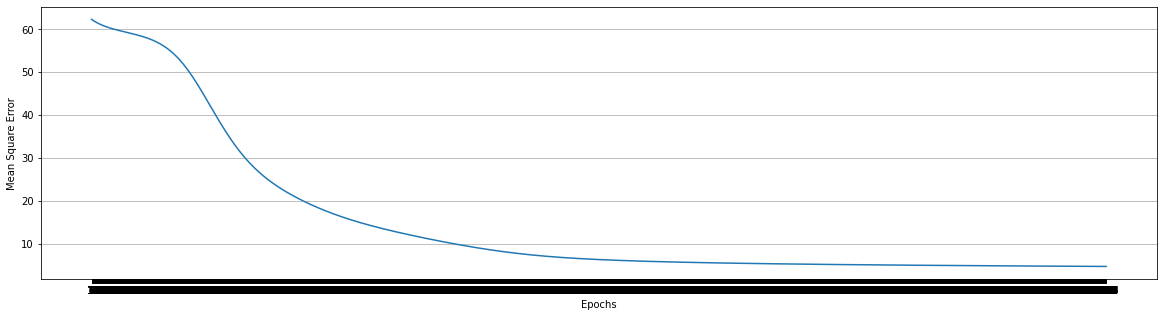

In [ ]:
x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((20,5)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")

1. [Matrix Factorization: A Simple Tutorial and Implementation in Python](https://albertauyeung.github.io/2017/04/23/python-matrix-factorization.html)
2.[Recommender System — Matrix Factorization](https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b)
3. [Recommendation Systems: Collaborative Filtering using Matrix Factorization — Simplified](https://medium.com/sfu-cspmp/recommendation-systems-collaborative-filtering-using-matrix-factorization-simplified-2118f4ef2cd3)
4. [A beginner’s guide to understanding and performing hyperparameter tuning for Machine Learning models](https://towardsdatascience.com/the-what-why-and-how-of-hyperparameter-tuning-for-machine-learning-models-1a2634e9ca9e)

